In [ ]:
!pip install ultralytics

In [9]:
import numpy as np 
import pandas as pd 
import torch
import os 
from tqdm import tqdm 
from pprint import pprint
import cv2
from ultralytics import YOLO
import PIL as Image
import matplotlib.pyplot as plt
import logging
logging.getLogger("ultralytics").setLevel(logging.ERROR)


In [4]:
device = "cuda" if torch.cuda.is_available() else "cpu"

In [ ]:
model = YOLO("/kaggle/input/train-cs331/runs/detect/train/weights/best.pt", verbose = False)
model.to(device)

In [15]:
def inference_image_in_test(image_path):
    result = model(image_path)  
    anno_image_path = image_path.replace("image", "label").replace(".jpg", ".txt")
    
    boxes = result[0].boxes.xyxy.cpu().numpy() 
    class_ids = result[0].boxes.cls.cpu().numpy().astype(int) 
    count_empty_parking = sum(1 for class_id in class_ids if class_id == 0)
    print(f"Number of available parking spaces: {count_empty_parking}")
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  
    
    predict_image = image.copy()
    for box, cls in zip(boxes, class_ids):
        x1, y1, x2, y2 = map(int, box)
        cv2.rectangle(predict_image, (x1, y1), (x2, y2), (0, 255, 0), 2)  
#         cv2.putText(predict_image, f"Pred: {int(cls)}", (x1, y1 - 10),
#                     cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2) 
    
    actual_image = image.copy()
    image_height, image_width, _ = actual_image.shape
    with open(anno_image_path, "r") as file:
        lines = file.readlines()
        for line in lines:
            parts = line.strip().split()  
            cls, x_center, y_center, width, height = map(float,parts)
            x_min = (x_center - width/2) * image_width
            y_min = (y_center - height/2) * image_height
            width = width * image_width
            height = height * image_height
            x_min, y_min, width, height = map(int, [x_min, y_min, width, height])
            cv2.rectangle(actual_image, (x_min, y_min), (x_min + width, y_min + height), (255, 0, 0), 2)  
#             cv2.putText(actual_image, f"Actual: {int(cls)}", (x1, y1 - 10),
#                         cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2) 
    
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.title("Predicted")
    plt.imshow(predict_image)
    plt.axis("off")
    
    plt.subplot(1, 2, 2)
    plt.title("Actual")
    plt.imshow(actual_image)
    plt.axis("off")
    
    plt.show()


Number of available parking spaces: 0


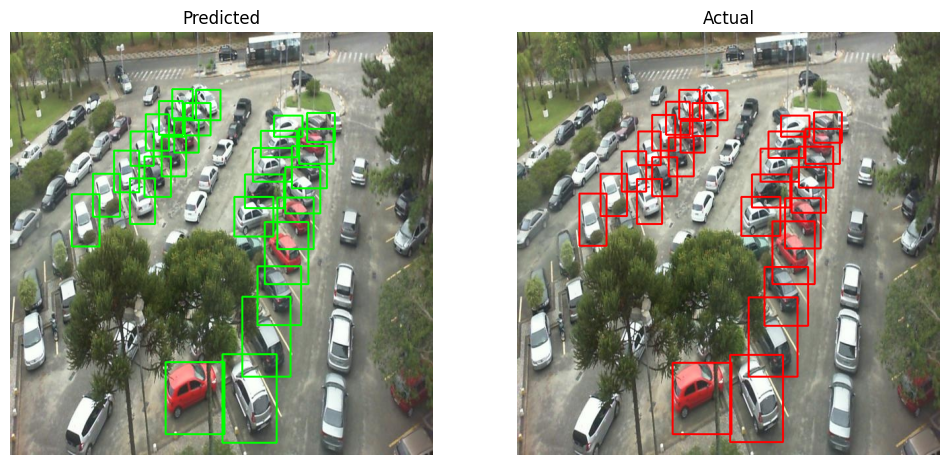

In [16]:
image_path = "/kaggle/input/data-cs331/dataset/images/test/1012.jpg"
inference_image_in_test(image_path)

In [37]:
def inference_image(image_path):
    results = model(image_path)
    
    predict_image = cv2.imread(image_path) 
    predict_image = cv2.cvtColor(predict_image, cv2.COLOR_BGR2RGB)  
    
    bboxes = results[0].boxes.xyxy.cpu().numpy()
    class_ids = results[0].boxes.cls.cpu().numpy().astype(int)
    
    for box, cls in zip(bboxes, class_ids):
        x1, y1, x2, y2 = map(int, box[:4]) 
        cv2.rectangle(predict_image, (x1, y1), (x2, y2), color=(255,255,0), thickness=2)  
#         cv2.putText(predict_image, f"{cls}", (x1, y1 - 10), 
#                     cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 0), 2)  
                    
    plt.figure(figsize=(12, 6))
    plt.imshow(predict_image)
    plt.axis("off")
    plt.show()


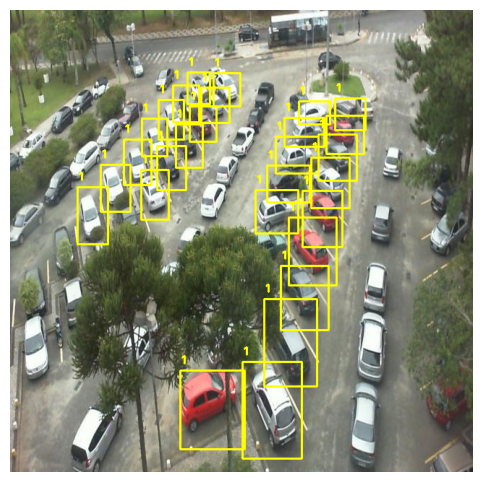

In [38]:
inference_image(image_path)

In [40]:
def inference_video(video_path):
    cap = cv2.VideoCapture(video_path)
    height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
    width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))  
    out_video = cv2.VideoWriter(args.output_path, cv2.VideoWriter_fourcc(*"MJPG"), int(cap.get(cv2.CAP_PROP_FPS)), (width, height))
    
    while cap.isOpened():
        flag, frame = cap.read()
        if not flag:
            break
    
        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)  
        image = cv2.resize(image, (640, 640))  

        results = model(image)
        
        bboxes = results.xyxy[0].cpu().numpy()  
        class_ids = results.classes[0].cpu().numpy() 

        for box, cls in zip(bboxes, class_ids):
            x1, y1, x2, y2 = map(int, box[:4])  
            label = f"Class {cls}"  
            cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 255, 0), 2)  
            cv2.putText(frame, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)  
        out_video.write(frame)
    
    cap.release()
    out_video.release()

In [ ]:
video_path = ""
output_path = "/kaggle/working/" 

In [ ]:
inference_video(video_path)